In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
details = pd.read_csv("patient_icu_ward_stay_list_deid.csv", sep=',')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,07/10/1999,NaN,Male,1,28/04/2016 11:15,29/04/2016 12:15,NaN,NaN,1,1.0,28/04/2016 19:00,5.0,NaN,PICU
1,ZI0001,07/10/1999,NaN,Male,2,07/05/2016 13:43,08/05/2016 15:25,NaN,NaN,1,1.0,07/05/2016 17:00,3.0,NaN,PICU
2,XY0002,09/06/1998,NaN,Male,1,07/01/2016 16:20,09/01/2016 16:22,NaN,NaN,1,1.0,07/01/2016 18:00,5.0,NaN,PICU
3,DX0003,04/11/1998,NaN,Female,1,24/06/2016 18:05,25/06/2016 16:22,NaN,NaN,1,1.0,25/06/2016 01:00,5.0,NaN,FLAMI
4,FK0004,09/03/1999,NaN,Female,1,03/03/2017 15:04,20/03/2017 14:17,1.0,04/03/2017 14:45,1,1.0,11/03/2017 15:00,1.0,04/03/2017 15:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,11/01/2018,NaN,Male,1,29/12/2018 21:35,31/12/2018 12:54,NaN,NaN,1,1.0,31/12/2018 00:00,5.0,NaN,PICU
5653,HK4117,28/12/2018,NaN,Male,1,28/12/2018 08:20,01/01/2019 13:15,NaN,NaN,1,1.0,28/12/2018 18:00,5.0,NaN,NICU
5654,TI4118,11/09/2016,NaN,Male,1,26/12/2018 21:20,08/01/2019 12:51,NaN,NaN,1,1.0,03/01/2019 12:00,5.0,NaN,PICU
5655,KI4119,13/05/2016,NaN,Female,1,30/12/2018 22:42,31/12/2018 16:39,NaN,NaN,0,0.0,NaN,NaN,NaN,PICU


In [3]:
details['extubation_deid_date'] = pd.to_datetime(details['extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['failed_extubation_deid_date'] = pd.to_datetime(details['failed_extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['re_intubation_deid_date'] = pd.to_datetime(details['re_intubation_deid_date'], format='%d/%m/%Y %H:%M')
details['death_deid_date'] = pd.to_datetime(details['death_deid_date'], format='%d/%m/%Y')
details['icu_start_deid_dttm'] = pd.to_datetime(details['icu_start_deid_dttm'], format='%d/%m/%Y %H:%M')
details['icu_end_deid_dttm'] = pd.to_datetime(details['icu_end_deid_dttm'], format='%d/%m/%Y %H:%M')
details['birth_deid_date'] = pd.to_datetime(details['birth_deid_date'], format='%d/%m/%Y')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
4,FK0004,1999-03-09,NaT,Female,1,2017-03-03 15:04:00,2017-03-20 14:17:00,1.0,2017-03-04 14:45:00,1,1.0,2017-03-11 15:00:00,1.0,2017-03-04 15:00:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU
5655,KI4119,2016-05-13,NaT,Female,1,2018-12-30 22:42:00,2018-12-31 16:39:00,NaN,NaT,0,0.0,NaT,NaN,NaT,PICU


## REMOVING PATIENTS WITH LOW CONFIDENCE SCORE (992 patients removed)

In [4]:
details_all_scores = details
details = details_all_scores[details_all_scores["extubation_score"]>2.5]
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


In [5]:
cohort_1_details = details[pd.isnull(details["failed_extubation_deid_date"]) == False]
cohort_2_details_temp = details[(details["failed_extubation_flag"] != 1.0)]
cohort_2_details = cohort_2_details_temp[pd.isnull(cohort_2_details_temp["death_deid_date"]) == True]
cohort_3_details_temp = details[pd.isnull(details["death_deid_date"]) == False]
cohort_3_details = cohort_3_details_temp[pd.isnull(cohort_3_details_temp["failed_extubation_deid_date"]) == True]
cohort_3_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
49,OL0043,2000-07-12,2018-04-25,Female,2,2016-06-08 18:56:00,2016-06-09 13:01:00,NaN,NaT,1,1.0,2016-06-09 02:00:00,5.0,NaT,PICU
91,JT0073,2003-04-26,2018-08-18,Male,1,2018-07-27 12:50:00,2018-07-30 15:15:00,NaN,NaT,1,1.0,2018-07-29 15:15:00,5.0,NaT,FLAMI
124,CD0102,2003-02-18,2018-09-17,Male,1,2017-08-05 09:37:00,2017-08-12 17:56:00,NaN,NaT,1,1.0,2017-08-09 19:00:00,5.0,NaT,PICU
160,XX0133,2002-01-25,2018-01-24,Male,1,2016-02-15 01:15:00,2016-02-26 12:35:00,NaN,NaT,1,1.0,2016-02-21 11:00:00,5.0,NaT,PICU
181,DN0147,2000-08-11,2017-08-19,Female,1,2016-10-13 23:45:00,2016-10-15 13:42:00,NaN,NaT,1,1.0,2016-10-14 14:00:00,5.0,NaT,PICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,PM3943,2018-09-19,2018-10-20,Male,1,2018-10-14 01:15:00,2018-10-20 23:10:00,NaN,NaT,1,1.0,2018-10-20 23:00:00,5.0,NaT,PICU
5483,IE3963,2013-04-09,2018-11-20,Female,1,2018-10-24 20:15:00,2018-11-20 18:46:00,NaN,NaT,1,1.0,2018-10-31 13:00:00,5.0,NaT,FLAMI
5535,BB4010,2003-09-15,2018-11-20,Female,1,2018-11-06 02:00:00,2018-11-20 23:25:00,NaN,NaT,1,1.0,2018-11-20 23:00:00,5.0,NaT,FLAMI
5551,WE4023,2018-11-10,2019-01-03,Female,2,2018-12-23 16:36:00,2019-01-03 10:20:00,NaN,NaT,1,1.0,2019-01-03 09:30:00,5.0,NaT,NICU


In [6]:
i = 0
for p in cohort_1_details["death_deid_date"]:
    if pd.isnull(p)==False:
        i+=1
        print(p)
print(i)


2017-09-18 00:00:00
2017-10-31 00:00:00
2017-05-15 00:00:00
2017-06-03 00:00:00
2018-01-15 00:00:00
2018-04-11 00:00:00
2018-05-12 00:00:00
2016-07-18 00:00:00
2016-10-28 00:00:00
2016-10-22 00:00:00
2018-04-09 00:00:00
2017-03-22 00:00:00
2017-07-02 00:00:00
2017-08-05 00:00:00
2017-07-04 00:00:00
2018-10-14 00:00:00
2017-05-20 00:00:00
2017-04-06 00:00:00
2017-07-01 00:00:00
2018-05-06 00:00:00
2017-10-12 00:00:00
2018-11-08 00:00:00
2018-06-25 00:00:00
2018-07-04 00:00:00
2018-07-11 00:00:00
2018-10-31 00:00:00
2018-10-30 00:00:00
27


### Note: 27 (this number may have changed) patients in cohort 1 who died AFTER a failed extubation, do we assume that the failed extubation time is a mistake or keep them in?


In [7]:
cohort_1_details = cohort_1_details[pd.isnull(cohort_1_details["death_deid_date"])==True]
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


### THey have been removed from cohort 1, they are is cohort 3 only - this is ok just make sure to analyse them a bit differently because if they died due to improper reintubation then their dynamics will be different

In [8]:
cohort_1_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_1_details['re_intubation_deid_date'], cohort_1_details['failed_extubation_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_1_details


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,30.0
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,30.0
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0
198,PQ0160,2002-05-08,NaT,Female,1,2018-02-11 00:01:00,2018-03-04 15:13:00,1.0,2018-02-24 17:50:00,1,1.0,2018-02-24 18:00:00,5.0,2018-02-25 01:00:00,PICU,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,180.0
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0


## 50 patients with duration < 120

In [9]:
cohort_1_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_1_details['extubation_deid_date'], cohort_1_details['birth_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_1_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration,age (days)
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,30.0,5666.583333
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0,5016.458333
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,30.0,5710.541667
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0,5502.541667
198,PQ0160,2002-05-08,NaT,Female,1,2018-02-11 00:01:00,2018-03-04 15:13:00,1.0,2018-02-24 17:50:00,1,1.0,2018-02-24 18:00:00,5.0,2018-02-25 01:00:00,PICU,430.0,5771.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,180.0,83.750000
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0,23.625000
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0,5.458333
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0,76.493750


Text(0, 0.5, 'Proportion')

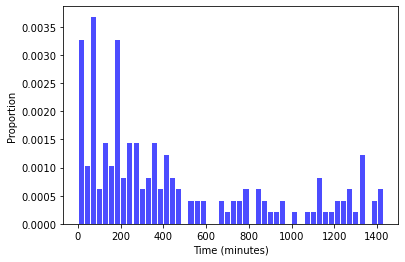

In [10]:

plt.hist(cohort_1_details['extubation_duration'], facecolor='blue', bins=50, density=True, alpha=0.7, rwidth=0.83)
plt.xlabel("Time (minutes)")
plt.ylabel("Proportion")

In [11]:
cohort_1_extubation_duration = pd.DataFrame(cohort_1_details['extubation_duration'])
cohort_1_extubation_duration = cohort_1_extubation_duration.sort_values(by='extubation_duration')
cohort_1_extubation_duration

,extubation_duration
3060,0.0
2965,0.0
946,0.0
5068,0.0
5082,0.0
...,...
3147,1380.0
2459,1380.0
4330,1410.0
896,1428.0


In [12]:
extubation_time_quantiles = cohort_1_extubation_duration.quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
extubation_time_quantiles


,extubation_duration
0.0,0.0
0.1,30.0
0.2,70.0
0.3,150.0
0.4,180.0
0.5,285.0
0.6,390.0
0.7,540.0
0.8,840.0
0.9,1220.0


## Old

Window of 30 means we throw away 20% of data

Window of 60 means we throw away 30% of data

Window of 90 means we throw away 40% of data

In [13]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


In [14]:
cohort_1_details = cohort_1_details[cohort_1_details["extubation_duration"] > 120]
cohort_1_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration,age (days)
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0,5016.458333
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0,5502.541667
198,PQ0160,2002-05-08,NaT,Female,1,2018-02-11 00:01:00,2018-03-04 15:13:00,1.0,2018-02-24 17:50:00,1,1.0,2018-02-24 18:00:00,5.0,2018-02-25 01:00:00,PICU,430.0,5771.750000
204,SZ0162,2006-01-09,NaT,Male,1,2016-04-12 15:30:00,2016-05-12 13:00:00,1.0,2016-04-28 16:00:00,1,1.0,2016-04-28 16:00:00,5.0,2016-04-28 23:00:00,PICU,420.0,3762.666667
239,PC0192,2004-06-22,NaT,Male,1,2016-12-22 11:53:00,2017-02-18 17:13:00,1.0,2017-01-10 18:00:00,1,1.0,2016-12-28 18:00:00,5.0,2017-01-11 14:00:00,FLAMI,1200.0,4572.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,180.0,83.750000
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0,23.625000
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0,5.458333
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0,76.493750


### Age

(array([2.90686600e-03, 9.90977044e-04, 6.60651363e-04, 2.64260545e-04,
        1.98195409e-04, 3.96390818e-04, 1.32130273e-04, 6.60651363e-05,
        1.98195409e-04, 6.60651363e-05, 6.60651363e-05, 2.64260545e-04,
        1.98195409e-04, 6.60651363e-05, 1.32130273e-04, 0.00000000e+00,
        6.60651363e-05, 1.32130273e-04, 6.60651363e-05, 0.00000000e+00,
        1.32130273e-04, 6.60651363e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.60651363e-05, 6.60651363e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.60651363e-05, 0.00000000e+00,
        0.00000000e+00, 6.60651363e-05, 0.00000000e+00, 6.60651363e-05,
        0.00000000e+00, 1.32130273e-04, 6.60651363e-05, 0.00000000e+00,
        0.00000000e+00, 1.98195409e-04, 6.60651363e-05, 6.60651363e-05,
        0.00000000e+00, 6.60651363e-05, 0.00000000e+00, 1.32130273e-04,
        0.00000000e+00, 6.60651363e-05]),
 array([4.29166667e+00, 1.26360833e+02, 2.48430000e+02, 3.70499167e+02,
        4.92568333e+02

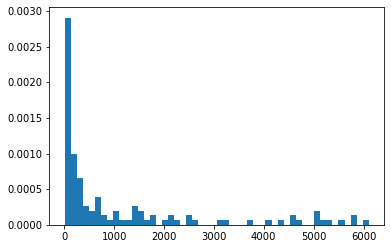

In [15]:
plt.hist(cohort_1_details['age (days)'], bins=50, density=True)

In [16]:
cohort_2_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_2_details['extubation_deid_date'], cohort_2_details['birth_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_2_details

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_49596/225197822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_2_details['extubation_deid_date'], cohort_2_details['birth_deid_date'])]


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days)
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000


In [17]:
print((cohort_2_details['extubation_deid_date'][1]-cohort_2_details['birth_deid_date'][1]).total_seconds()/86400)

6057.708333333333


In [18]:
cohort_1_age = pd.DataFrame(cohort_1_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_2_age = pd.DataFrame(cohort_2_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_1_age


,age (days)
0.0,4.291667
0.1,14.639583
0.2,35.016667
0.3,95.054167
0.4,186.633333
0.5,276.937500
0.6,579.840000
0.7,1067.208403
0.8,1766.358333
0.9,4242.979167


In [19]:
pd.DataFrame(cohort_2_age)

,age (days)
0.0,0.750000
0.1,14.470833
0.2,54.541667
0.3,108.535417
0.4,185.783333
0.5,306.500000
0.6,570.226389
0.7,1227.833333
0.8,2360.787500
0.9,4386.358333


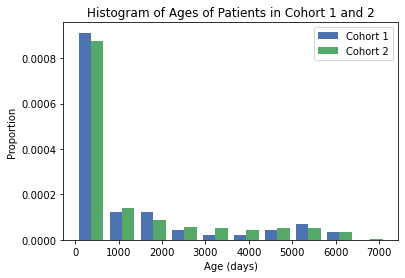

In [20]:
plt.style.use('seaborn-deep')

x = cohort_1_details['age (days)']
y = cohort_2_details['age (days)']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("Age (days)")
plt.ylabel("Proportion")
plt.title("Histogram of Ages of Patients in Cohort 1 and 2")
plt.show()

In [21]:
cohort_1_sex = pd.DataFrame(cohort_1_details['sex'].value_counts())
cohort_1_sex

,sex
Male,68
Female,56


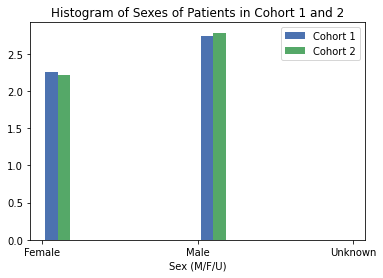

In [22]:
plt.style.use('seaborn-deep')

x = cohort_1_details['sex']
y = cohort_2_details['sex']

# plt.figure(figsize=(1,7))
plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("Sex (M/F/U)")
# plt.ylabel("Proportion")
plt.title("Histogram of Sexes of Patients in Cohort 1 and 2")
plt.show()

In [23]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,62
FLAMI,46
NICU,16


In [24]:
cohort_2_monitor = pd.DataFrame(cohort_2_details['icu_ward'].value_counts())
cohort_2_monitor

,icu_ward
FLAMI,1688
PICU,1175
NICU,381


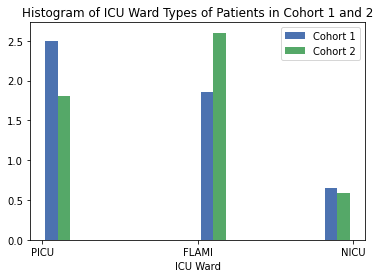

In [25]:
plt.style.use('seaborn-deep')

x = cohort_1_details['icu_ward']
y = cohort_2_details['icu_ward']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("ICU Ward")
# plt.ylabel("Proportion")
plt.title("Histogram of ICU Ward Types of Patients in Cohort 1 and 2")
plt.show()

In [26]:
cohort_2_details["age_category"] = 0
cohort_2_details



/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_49596/1644365135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["age_category"] = 0


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667,0
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333,0
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000,0
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667,0
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333,0
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000,0
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000,0
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000,0


In [27]:
pd.cut(cohort_2_details['age (days)'],[0, 14.6, 35.0, 95.1, 186.6, 276.9, 579.8, 1067.2, 1766.4, 4243.0, 7164]).value_counts()


(1766.4, 4243.0]    432
(95.1, 186.6]       407
(276.9, 579.8]      387
(35.0, 95.1]        363
(4243.0, 7164.0]    347
(0.0, 14.6]         331
(1067.2, 1766.4]    267
(186.6, 276.9]      263
(579.8, 1067.2]     246
(14.6, 35.0]        201
Name: age (days), dtype: int64

In [28]:
for age in cohort_2_details['age (days)']:
    if not age:
        print(age)

This explanation is based on old data....
- Minimum is 190 so we take a sample of 190 from each of these strata 
- 1900 patients remaining from 4852
- Will have 39.159% of data remaining after stratifying age
- Then stratifying depending on icu_minotor looses 29.3%
- Left with 27.7% of cohort 2

In [29]:
pd.cut(cohort_1_details['age (days)'],[0, 14.6, 35.0, 95.1, 186.1, 276.9, 579.8, 1067.2, 1766.4, 4243.0, 6107.8]).value_counts()

(0.0, 14.6]         13
(95.1, 186.1]       13
(579.8, 1067.2]     13
(4243.0, 6107.8]    13
(14.6, 35.0]        12
(35.0, 95.1]        12
(186.1, 276.9]      12
(276.9, 579.8]      12
(1067.2, 1766.4]    12
(1766.4, 4243.0]    12
Name: age (days), dtype: int64

In [30]:
#old cut
pd.cut(cohort_2_details['age (days)'],[0, 14.3, 32.8, 90.2, 185.6, 269.4, 599.5, 1112.7, 1802.0, 4150.1, 6107.8]).value_counts()

(90.2, 185.6]       425
(269.4, 599.5]      415
(1802.0, 4150.1]    404
(32.8, 90.2]        351
(4150.1, 6107.8]    323
(0.0, 14.3]         322
(599.5, 1112.7]     256
(1112.7, 1802.0]    256
(185.6, 269.4]      254
(14.3, 32.8]        198
Name: age (days), dtype: int64

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_49596/1675098103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["amount of data (days)"] = [((x - y).total_seconds())/60 for x, y in zip(cohort_2_details['icu_end_deid_dttm'], cohort_2_details['extubation_deid_date'])]


(array([3.041e+03, 1.220e+02, 3.900e+01, 1.500e+01, 6.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.0000000e+01, 1.4456240e+04, 2.8882480e+04, 4.3308720e+04,
        5.7734960e+04, 7.2161200e+04, 8.6587440e+04, 1.0101368e+05,
        1.1543992e+05, 1.2986616e+05, 1.4429240e+05, 1.5871864e+05,
        1.7314488e+05, 1.8757112e+05, 2.0199736e+05, 2.1642360e+05,
        2.3084984e+05, 2.4527608e+05, 2.5970232e+05, 2.7412856e+05,
        2.8855480e+05, 3.0298104e+05

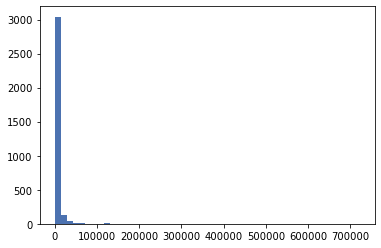

In [31]:
#checking how much data we have after extubation point for cohort 2

cohort_2_details["amount of data (days)"] = [((x - y).total_seconds())/60 for x, y in zip(cohort_2_details['icu_end_deid_dttm'], cohort_2_details['extubation_deid_date'])]
plt.hist(cohort_2_details["amount of data (days)"], bins=50)


In [32]:
cohort_2_details["amount of data (days)"]

0       1035.0
1       1345.0
2       2782.0
3        922.0
5       2826.0
         ...  
5651    1635.0
5652     774.0
5653    5475.0
5654    7251.0
5656    4897.0
Name: amount of data (days), Length: 3244, dtype: float64

(array([33., 22., 16.,  6.,  7.,  9.,  4.,  7.,  9., 11.]),
 array([ 123. ,  253.7,  384.4,  515.1,  645.8,  776.5,  907.2, 1037.9,
        1168.6, 1299.3, 1430. ]),
 <BarContainer object of 10 artists>)

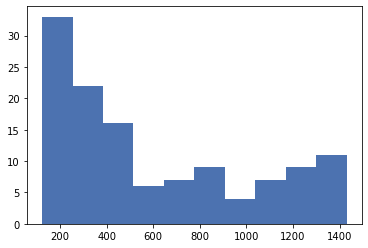

In [33]:
plt.hist(cohort_1_details["extubation_duration"])



In [34]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category,amount of data (days)
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667,0,1035.0
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333,0,1345.0
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000,0,2782.0
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667,0,922.0
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139,0,2826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333,0,1635.0
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000,0,774.0
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000,0,5475.0
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000,0,7251.0


## CHECKING WHICH ORDER OF STRATIFICATION LOOSES LESS DATA

In [35]:
cohort_2_details["age_category"] = 0
cohort_2_age

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_49596/1832144068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["age_category"] = 0


,age (days)
0.0,0.750000
0.1,14.470833
0.2,54.541667
0.3,108.535417
0.4,185.783333
0.5,306.500000
0.6,570.226389
0.7,1227.833333
0.8,2360.787500
0.9,4386.358333


In [36]:
for i, a in zip(cohort_2_details.index, cohort_2_details["age (days)"]):
    if a < 14.6:
        cohort_2_details["age_category"].loc[i] = 1
    if 14.6 <= a < 35:
        cohort_2_details["age_category"].loc[i] = 2
    if 35 <= a < 95.1:
        cohort_2_details["age_category"].loc[i] = 3
    if 95.1 <= a < 186.1:
        cohort_2_details["age_category"].loc[i] = 4
    if 186.1 <= a < 276.9:
        cohort_2_details["age_category"].loc[i] = 5
    if 276.9 <= a < 579.8:
        cohort_2_details["age_category"].loc[i] = 6
    if 579.8 <= a < 1067.2:
        cohort_2_details["age_category"].loc[i] = 7
    if 1067.2 <= a < 1766.4:
        cohort_2_details["age_category"].loc[i] = 8
    if 1766.4 <= a < 4243:
        cohort_2_details["age_category"].loc[i] = 9
    if 4243 <= a < 7164:
        cohort_2_details["age_category"].loc[i] = 10


/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
cohort_2_stratified_age = cohort_2_details.groupby('age_category', group_keys=False).apply(lambda x: x.sample(201))
cohort_2_stratified_age


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category,amount of data (days)
5513,JC3990,2018-10-19,NaT,Female,2,2018-10-27 21:00:00,2018-11-01 11:45:00,NaN,NaT,1,1.0,2018-10-30 18:00:00,5.0,NaT,NICU,11.750000,1,2505.0
3264,VA2331,2017-02-08,NaT,Male,1,2017-02-08 13:00:00,2017-02-15 16:27:00,NaN,NaT,1,1.0,2017-02-13 19:00:00,5.0,NaT,NICU,5.791667,1,2727.0
5362,PH3863,2018-08-23,NaT,Female,1,2018-08-24 17:20:00,2018-08-30 13:00:00,NaN,NaT,1,1.0,2018-08-27 13:00:00,5.0,NaT,PICU,4.541667,1,4320.0
2521,AW1821,2016-08-05,NaT,Female,1,2016-08-07 20:45:00,2016-08-12 18:30:00,NaN,NaT,1,1.0,2016-08-10 00:00:00,5.0,NaT,NICU,5.000000,1,3990.0
5313,ZZ3819,2018-08-05,NaT,Male,2,2018-08-07 19:18:00,2018-08-15 03:30:00,NaN,NaT,1,1.0,2018-08-11 16:00:00,5.0,NaT,NICU,6.666667,1,5010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,6386.750000,10,1320.0
667,KY0537,2004-03-07,NaT,Male,1,2017-07-22 08:45:00,2017-08-04 13:20:00,NaN,NaT,1,1.0,2017-07-25 09:00:00,5.0,NaT,FLAMI,4888.375000,10,14660.0
16,KX0015,2000-08-02,NaT,Female,1,2016-08-22 17:09:00,2016-08-23 15:13:00,NaN,NaT,1,1.0,2016-08-23 00:00:00,5.0,NaT,PICU,5865.000000,10,913.0
430,LI0346,2006-04-03,NaT,Male,2,2018-11-23 18:20:00,2018-11-27 14:23:00,NaN,NaT,1,1.0,2018-11-25 01:00:00,5.0,NaT,PICU,4619.041667,10,3683.0


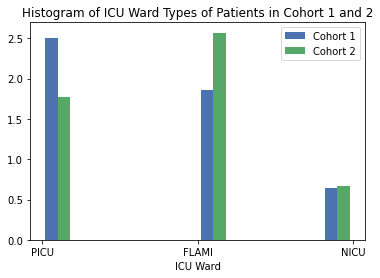

In [38]:
plt.style.use('seaborn-deep')

x = cohort_1_details['icu_ward']
y = cohort_2_stratified_age['icu_ward']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("ICU Ward")
# plt.ylabel("Proportion")
plt.title("Histogram of ICU Ward Types of Patients in Cohort 1 and 2")
plt.show()

In [39]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,62
FLAMI,46
NICU,16


In [40]:
cohort_2_monitor = pd.DataFrame(cohort_2_stratified_age['icu_ward'].value_counts())
cohort_2_monitor

,icu_ward
FLAMI,1033
PICU,711
NICU,266


50% PICU, 37.1% FLAMI, 12.9% NICU

In [50]:
cohort_2_stratified_age_icu_temp = cohort_2_stratified_age[cohort_2_stratified_age['icu_ward']=='PICU'].sample(n=716, )
cohort_2_stratified_age_icu_temp = cohort_2_stratified_age_icu_temp.append(cohort_2_stratified_age[cohort_2_stratified_age['icu_ward']=='FLAMI'].sample(n=531))
cohort_2_stratified_age_icu_temp = cohort_2_stratified_age_icu_temp.append(cohort_2_stratified_age[cohort_2_stratified_age['icu_ward']=='NICU'].sample(n=185))

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
cohort_2_stratified_age_icu = cohort_2_stratified_age_icu_temp
cohort_2_stratified_age_icu

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category,amount of data (days)
1773,LQ1320,2015-04-22,NaT,Male,1,2016-02-20 16:11:00,2016-02-29 15:55:00,NaN,NaT,1,1.0,2016-02-28 14:00:00,5.0,NaT,PICU,312.583333,6,1555.0
3949,CF2822,2015-04-10,NaT,Female,2,2017-07-29 19:16:00,2017-08-08 18:40:00,NaN,NaT,1,1.0,2017-08-05 18:45:00,5.0,NaT,PICU,848.781250,7,4315.0
5363,IC3864,2018-08-28,NaT,Male,1,2018-08-28 22:23:00,2018-09-01 14:58:00,NaN,NaT,1,1.0,2018-08-30 19:15:00,5.0,NaT,PICU,2.802083,1,2623.0
1176,AF0913,2015-06-22,NaT,Female,1,2016-03-06 18:55:00,2016-03-17 14:10:00,NaN,NaT,1,1.0,2016-03-07 18:00:00,5.0,NaT,PICU,259.750000,5,14170.0
425,VA0342,2002-05-20,NaT,Female,1,2017-09-16 19:15:00,2017-09-19 13:00:00,NaN,NaT,1,1.0,2017-09-17 11:00:00,5.0,NaT,PICU,5599.458333,10,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,OI3222,2017-12-07,NaT,Male,1,2017-12-08 19:00:00,2017-12-14 15:23:00,NaN,NaT,1,1.0,2017-12-13 13:09:00,5.0,NaT,NICU,6.547917,1,1574.0
5117,SR3669,2018-06-07,NaT,Female,2,2018-06-17 15:25:00,2018-06-18 14:15:00,NaN,NaT,1,1.0,2018-06-17 20:00:00,4.0,NaT,NICU,10.833333,1,1095.0
4953,MX3551,2017-10-27,NaT,Male,1,2018-04-22 15:35:00,2018-04-23 20:15:00,NaN,NaT,1,1.0,2018-04-23 15:00:00,5.0,NaT,NICU,178.625000,4,315.0
2858,MF2056,2016-10-28,NaT,Female,1,2016-10-28 20:15:00,2016-11-14 16:15:00,NaN,NaT,1,1.0,2016-11-08 13:00:00,5.0,NaT,NICU,11.541667,1,8835.0


### NOW TRY ICU WARD THEN AGE

In [51]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,62
FLAMI,46
NICU,16


In [52]:
cohort_2_monitor = pd.DataFrame(cohort_2_details['icu_ward'].value_counts())
cohort_2_monitor


,icu_ward
FLAMI,1688
PICU,1175
NICU,381


In [53]:
cohort_2_stratified_icu_temp = cohort_2_details[cohort_2_details['icu_ward']=='PICU'].sample(n=1175, random_state = 2)
cohort_2_stratified_icu_temp = cohort_2_stratified_icu_temp.append(cohort_2_details[cohort_2_details['icu_ward']=='FLAMI'].sample(n=872, random_state = 2))
cohort_2_stratified_icu_temp = cohort_2_stratified_icu_temp.append(cohort_2_details[cohort_2_details['icu_ward']=='NICU'].sample(n=303, random_state = 2))

In [54]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category,amount of data (days)
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667,10,1035.0
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333,10,1345.0
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000,10,2782.0
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667,10,922.0
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139,10,2826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333,3,1635.0
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000,6,774.0
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000,1,5475.0
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000,7,7251.0


In [55]:
cohort_2_stratified_icu = cohort_2_stratified_icu_temp
cohort_2_stratified_icu

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category,amount of data (days)
2634,AP1899,2003-03-05,NaT,Female,1,2016-09-10 16:57:00,2016-09-23 12:43:00,NaN,NaT,1,1.0,2016-09-13 15:00:00,5.0,NaT,PICU,4941.625000,10,14263.0
302,KU0241,2003-09-22,NaT,Female,1,2017-01-01 17:29:00,2017-01-03 17:09:00,NaN,NaT,1,1.0,2017-01-02 13:00:00,5.0,NaT,PICU,4851.541667,10,1689.0
3954,WF2826,2017-01-23,NaT,Female,2,2017-10-30 20:33:00,2017-11-13 15:40:00,NaN,NaT,1,1.0,2017-11-02 17:00:00,5.0,NaT,PICU,283.708333,6,15760.0
1049,QG0833,2004-06-03,NaT,Male,2,2017-10-09 22:45:00,2017-11-10 10:39:00,NaN,NaT,1,1.0,2017-10-13 01:00:00,5.0,NaT,PICU,4880.041667,10,40899.0
157,KI0131,2004-10-29,NaT,Female,2,2018-08-27 17:01:00,2018-09-05 14:15:00,NaN,NaT,1,1.0,2018-09-01 22:00:00,5.0,NaT,PICU,5055.916667,10,5295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,DE3706,2018-06-18,NaT,Male,1,2018-06-30 20:20:00,2018-07-21 16:42:00,NaN,NaT,1,1.0,2018-07-04 15:00:00,3.0,NaT,NICU,16.625000,2,24582.0
3592,YX2562,2017-05-02,NaT,Male,2,2017-05-03 19:00:00,2017-05-22 15:45:00,NaN,NaT,1,1.0,2017-05-19 01:00:00,4.0,NaT,NICU,17.041667,2,5205.0
3264,VA2331,2017-02-08,NaT,Male,1,2017-02-08 13:00:00,2017-02-15 16:27:00,NaN,NaT,1,1.0,2017-02-13 19:00:00,5.0,NaT,NICU,5.791667,1,2727.0
1756,LQ1306,2015-12-16,NaT,Male,1,2016-02-12 19:20:00,2016-02-22 12:30:00,NaN,NaT,1,1.0,2016-02-20 10:00:00,5.0,NaT,NICU,66.416667,3,3030.0


In [56]:
pd.cut(cohort_2_stratified_icu['age (days)'],[0, 14.6, 35.0, 95.1, 186.6, 276.9, 579.8, 1067.2, 1766.4, 4243.0, 7164]).value_counts()



(1766.4, 4243.0]    342
(276.9, 579.8]      288
(4243.0, 7164.0]    273
(35.0, 95.1]        265
(95.1, 186.6]       262
(0.0, 14.6]         238
(1067.2, 1766.4]    192
(186.6, 276.9]      172
(579.8, 1067.2]     169
(14.6, 35.0]        149
Name: age (days), dtype: int64

In [57]:
cohort_2_stratified_icu_age = cohort_2_stratified_icu.groupby('age_category', group_keys=False).apply(lambda x: x.sample(149))
cohort_2_stratified_icu_age

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),age_category,amount of data (days)
5518,VP3995,2018-10-14,NaT,Female,1,2018-10-23 03:40:00,2018-10-30 11:50:00,NaN,NaT,1,1.0,2018-10-24 19:00:00,5.0,NaT,FLAMI,10.791667,1,8210.0
3764,ZV2690,2017-06-06,NaT,Male,2,2017-06-12 05:00:00,2017-06-25 13:00:00,NaN,NaT,1,1.0,2017-06-17 14:00:00,5.0,NaT,FLAMI,11.583333,1,11460.0
5295,YR3805,2018-07-30,NaT,Male,1,2018-08-06 15:27:00,2018-08-12 16:00:00,NaN,NaT,1,1.0,2018-08-10 08:00:00,5.0,NaT,FLAMI,11.333333,1,3360.0
2749,TH1976,2016-09-18,NaT,Female,1,2016-09-23 00:30:00,2016-10-02 13:30:00,NaN,NaT,1,1.0,2016-10-01 13:00:00,5.0,NaT,NICU,13.541667,1,1470.0
1807,ZA1349,2016-03-02,NaT,Female,1,2016-03-02 22:15:00,2016-03-08 19:14:00,NaN,NaT,1,1.0,2016-03-06 12:00:00,5.0,NaT,FLAMI,4.500000,1,3314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,II0388,2004-07-20,NaT,Female,2,2018-08-11 16:48:00,2018-08-13 18:00:00,NaN,NaT,1,1.0,2018-08-12 09:00:00,5.0,NaT,PICU,5136.375000,10,1980.0
118,UI0097,2001-03-05,NaT,Male,1,2016-04-17 18:51:00,2016-04-19 15:56:00,NaN,NaT,1,1.0,2016-04-18 03:00:00,5.0,NaT,PICU,5523.125000,10,2216.0
78,NI0065,2002-02-19,NaT,Male,4,2017-10-02 15:38:00,2017-10-10 14:15:00,NaN,NaT,1,1.0,2017-10-07 12:00:00,5.0,NaT,PICU,5709.500000,10,4455.0
2154,OG1572,2002-01-17,NaT,Female,1,2016-05-01 04:30:00,2016-05-04 14:51:00,NaN,NaT,1,1.0,2016-05-01 19:44:00,5.0,NaT,PICU,5218.822222,10,4027.0


## AGE THEN ICU LEAVES 1432 PATIENTS
## ICU THEN AGE LEAVES 1440 PATIENTS

In [58]:
cohort_3_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
49,OL0043,2000-07-12,2018-04-25,Female,2,2016-06-08 18:56:00,2016-06-09 13:01:00,NaN,NaT,1,1.0,2016-06-09 02:00:00,5.0,NaT,PICU
91,JT0073,2003-04-26,2018-08-18,Male,1,2018-07-27 12:50:00,2018-07-30 15:15:00,NaN,NaT,1,1.0,2018-07-29 15:15:00,5.0,NaT,FLAMI
124,CD0102,2003-02-18,2018-09-17,Male,1,2017-08-05 09:37:00,2017-08-12 17:56:00,NaN,NaT,1,1.0,2017-08-09 19:00:00,5.0,NaT,PICU
160,XX0133,2002-01-25,2018-01-24,Male,1,2016-02-15 01:15:00,2016-02-26 12:35:00,NaN,NaT,1,1.0,2016-02-21 11:00:00,5.0,NaT,PICU
181,DN0147,2000-08-11,2017-08-19,Female,1,2016-10-13 23:45:00,2016-10-15 13:42:00,NaN,NaT,1,1.0,2016-10-14 14:00:00,5.0,NaT,PICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,PM3943,2018-09-19,2018-10-20,Male,1,2018-10-14 01:15:00,2018-10-20 23:10:00,NaN,NaT,1,1.0,2018-10-20 23:00:00,5.0,NaT,PICU
5483,IE3963,2013-04-09,2018-11-20,Female,1,2018-10-24 20:15:00,2018-11-20 18:46:00,NaN,NaT,1,1.0,2018-10-31 13:00:00,5.0,NaT,FLAMI
5535,BB4010,2003-09-15,2018-11-20,Female,1,2018-11-06 02:00:00,2018-11-20 23:25:00,NaN,NaT,1,1.0,2018-11-20 23:00:00,5.0,NaT,FLAMI
5551,WE4023,2018-11-10,2019-01-03,Female,2,2018-12-23 16:36:00,2019-01-03 10:20:00,NaN,NaT,1,1.0,2019-01-03 09:30:00,5.0,NaT,NICU


In [59]:
from visits import Visit

In [60]:
test = Visit("../In2Research_data/data/P/C/PC0600", cohort_1_details, cohort_2_stratified_icu_age, cohort_3_details)

In [61]:
test.directory

'../In2Research_data/data/P/C/PC0600'

In [62]:
test.project_id

'PC0600'

In [63]:
print(test.cohort)

1


In [64]:
test.details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration,age (days)
740,PC0600,2013-06-15,NaT,Male,1,2017-08-11 17:23:00,2017-08-23 18:50:00,1.0,2017-08-12 13:45:00,1,1.0,2017-08-12 13:45:00,5.0,2017-08-14 19:00:00,FLAMI,315.0,1519.572917
